In [1]:
%pwd

'C:\\Users\\gauqu\\Downloads'

In [2]:
import os
import shutil
import zipfile
from time import time

from IPython.display import Image, display
from pdf2image import convert_from_bytes, convert_from_path
from tqdm import tqdm
import cv2

import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [3]:
%cd "..\Desktop\Projet PRIM 2022-2023\document_class_classification\cnn_data"

C:\Users\gauqu\Desktop\Projet PRIM 2022-2023\document_class_classification\cnn_data


In [4]:
%pwd

'C:\\Users\\gauqu\\Desktop\\Projet PRIM 2022-2023\\document_class_classification\\cnn_data'

In [167]:
list_of_file_names = os.listdir()
list_of_file_names = list_of_file_names[:-2]

list_of_sources_per_class = np.load("list_of_sources_per_class_for_cnn.npy")

list_of_ground_truths = []

for file_name in list_of_file_names:
    file_name = file_name[:-4]
    for class_index in range(list_of_sources_per_class.shape[0]):
        is_found = False
        for file_index in range(list_of_sources_per_class.shape[1]):
            reference_name = list_of_sources_per_class[class_index, file_index]
            reference_name = str(reference_name)
            
            if len(reference_name) != 10:
                reference_name = list(reference_name)
                for nb_iter in range(len(reference_name), 10):
                    reference_name.append("0")
                reference_name = "".join(reference_name)
            
            if file_name == reference_name:
                is_found = True
                break
                
        if is_found == True:
            list_of_ground_truths.append(class_index)
            break
    
print(str(len(list_of_ground_truths)) + " == " + str(len(list_of_file_names)))

4892 == 4892


In [6]:
print(list_of_ground_truths)

for value in range(0, 44):
    print("%age of representativeness for class " + str(value) + " : " + str(100 * list_of_ground_truths.count(value) / len(list_of_ground_truths)) + " %")

[3, 17, 25, 30, 30, 30, 27, 30, 27, 7, 12, 30, 7, 7, 30, 7, 30, 7, 7, 27, 38, 12, 27, 27, 30, 27, 27, 27, 27, 27, 30, 16, 27, 27, 30, 27, 7, 23, 38, 30, 27, 7, 30, 27, 27, 30, 7, 30, 17, 27, 7, 27, 27, 27, 17, 7, 17, 30, 30, 27, 30, 23, 27, 30, 17, 27, 19, 17, 7, 7, 18, 30, 17, 27, 18, 27, 19, 7, 30, 30, 13, 30, 39, 28, 7, 26, 7, 30, 12, 17, 6, 7, 7, 17, 30, 7, 30, 1, 7, 7, 12, 6, 7, 7, 7, 30, 7, 23, 30, 7, 7, 30, 12, 6, 7, 7, 12, 7, 30, 7, 41, 30, 30, 38, 7, 30, 6, 7, 23, 7, 30, 7, 31, 12, 7, 7, 7, 7, 39, 11, 38, 17, 18, 17, 16, 17, 38, 1, 17, 3, 29, 17, 12, 1, 17, 17, 6, 17, 8, 3, 23, 12, 17, 13, 3, 18, 17, 17, 31, 19, 39, 38, 17, 31, 16, 13, 42, 17, 16, 33, 12, 17, 19, 17, 12, 19, 33, 12, 33, 12, 6, 39, 38, 12, 19, 12, 17, 12, 17, 0, 3, 29, 4, 22, 6, 13, 28, 17, 39, 26, 13, 13, 26, 2, 31, 39, 12, 3, 3, 25, 19, 12, 13, 12, 28, 38, 18, 12, 13, 10, 12, 0, 28, 0, 0, 3, 1, 26, 19, 29, 33, 31, 6, 12, 26, 3, 13, 19, 25, 13, 26, 3, 19, 24, 3, 38, 2, 3, 12, 10, 25, 13, 16, 33, 12, 13, 19, 2,

In [7]:
print(len(list_of_file_names))
print(len(list_of_ground_truths))

4892
4892


In [169]:
import random

#class_idx_1 = random.randint(0, 44)
#class_idx_2 = class_idx_1

#while class_idx_2 == class_idx_1:
#    class_idx_2 = random.randint(0, 44)
    
print(class_idx_1)
print(class_idx_2)

image_labels = []
image_names = []
    
index = 0
for idx in range(len(list_of_file_names)):
    index += 1
    file_name_without_extension = list_of_file_names[idx][:-4]
    
    if list_of_ground_truths[idx] == class_idx_1 or list_of_ground_truths[idx] == class_idx_2:
        #image = convert_from_path(list_of_file_names[idx], single_file=True, dpi=200, size = (1024, 1024), output_folder = './images', output_file=file_name_without_extension, poppler_path=r'C:\Program Files\poppler-0.68.0_x86\poppler-0.68.0\bin')
        image_labels.append(list_of_ground_truths[idx])
        image_names.append(file_name_without_extension + ".ppm")
    print(str(index) + " / " + str(len(list_of_file_names)))

38
36
1 / 4892
2 / 4892
3 / 4892
4 / 4892
5 / 4892
6 / 4892
7 / 4892
8 / 4892
9 / 4892
10 / 4892
11 / 4892
12 / 4892
13 / 4892
14 / 4892
15 / 4892
16 / 4892
17 / 4892
18 / 4892
19 / 4892
20 / 4892
21 / 4892
22 / 4892
23 / 4892
24 / 4892
25 / 4892
26 / 4892
27 / 4892
28 / 4892
29 / 4892
30 / 4892
31 / 4892
32 / 4892
33 / 4892
34 / 4892
35 / 4892
36 / 4892
37 / 4892
38 / 4892
39 / 4892
40 / 4892
41 / 4892
42 / 4892
43 / 4892
44 / 4892
45 / 4892
46 / 4892
47 / 4892
48 / 4892
49 / 4892
50 / 4892
51 / 4892
52 / 4892
53 / 4892
54 / 4892
55 / 4892
56 / 4892
57 / 4892
58 / 4892
59 / 4892
60 / 4892
61 / 4892
62 / 4892
63 / 4892
64 / 4892
65 / 4892
66 / 4892
67 / 4892
68 / 4892
69 / 4892
70 / 4892
71 / 4892
72 / 4892
73 / 4892
74 / 4892
75 / 4892
76 / 4892
77 / 4892
78 / 4892
79 / 4892
80 / 4892
81 / 4892
82 / 4892
83 / 4892
84 / 4892
85 / 4892
86 / 4892
87 / 4892
88 / 4892
89 / 4892
90 / 4892
91 / 4892
92 / 4892
93 / 4892
94 / 4892
95 / 4892
96 / 4892
97 / 4892
98 / 4892
99 / 4892
100 / 4892
10

3434 / 4892
3435 / 4892
3436 / 4892
3437 / 4892
3438 / 4892
3439 / 4892
3440 / 4892
3441 / 4892
3442 / 4892
3443 / 4892
3444 / 4892
3445 / 4892
3446 / 4892
3447 / 4892
3448 / 4892
3449 / 4892
3450 / 4892
3451 / 4892
3452 / 4892
3453 / 4892
3454 / 4892
3455 / 4892
3456 / 4892
3457 / 4892
3458 / 4892
3459 / 4892
3460 / 4892
3461 / 4892
3462 / 4892
3463 / 4892
3464 / 4892
3465 / 4892
3466 / 4892
3467 / 4892
3468 / 4892
3469 / 4892
3470 / 4892
3471 / 4892
3472 / 4892
3473 / 4892
3474 / 4892
3475 / 4892
3476 / 4892
3477 / 4892
3478 / 4892
3479 / 4892
3480 / 4892
3481 / 4892
3482 / 4892
3483 / 4892
3484 / 4892
3485 / 4892
3486 / 4892
3487 / 4892
3488 / 4892
3489 / 4892
3490 / 4892
3491 / 4892
3492 / 4892
3493 / 4892
3494 / 4892
3495 / 4892
3496 / 4892
3497 / 4892
3498 / 4892
3499 / 4892
3500 / 4892
3501 / 4892
3502 / 4892
3503 / 4892
3504 / 4892
3505 / 4892
3506 / 4892
3507 / 4892
3508 / 4892
3509 / 4892
3510 / 4892
3511 / 4892
3512 / 4892
3513 / 4892
3514 / 4892
3515 / 4892
3516 / 4892
3517

In [76]:
learning_rate = 0.01

nb_filters = 16
kernel_size = (8, 8)
pool_size = (16, 16)

In [77]:
# For the moment, this model aims to predict whether the image belong to class class_idx_1 or not (by only showing images of class_idx_1 and class_idx_2)

cnn_model = torch.nn.Sequential(
    torch.nn.Conv2d(in_channels=1, out_channels=nb_filters, kernel_size=kernel_size, stride=(1, 1), padding='same'),
    torch.nn.ReLU(),
    torch.nn.AdaptiveMaxPool2d(output_size=(512, 512)),

    torch.nn.Conv2d(in_channels=nb_filters, out_channels=nb_filters, kernel_size=kernel_size, stride=(1, 1), padding='same'),
    torch.nn.ReLU(),
    torch.nn.AdaptiveMaxPool2d(output_size=(256, 256)),

    torch.nn.Conv2d(in_channels=nb_filters, out_channels=nb_filters, kernel_size=kernel_size, stride=(1, 1), padding='same'),
    torch.nn.ReLU(),
    torch.nn.AdaptiveMaxPool2d(output_size=(16, 16)),

    torch.nn.Flatten(0, 2),
    torch.nn.Linear(in_features=16 ** 2 * 16, out_features=16 ** 2 * 16),
    torch.nn.ReLU(),
    torch.nn.Linear(in_features= 16 ** 2 * 16, out_features=1)
)

criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=learning_rate)

In [11]:
print(image_names[1])
print(image_labels[1])

1801.00077.pgm
38


tensor([-0.0278], grad_fn=<AddBackward0>)


KeyboardInterrupt: 

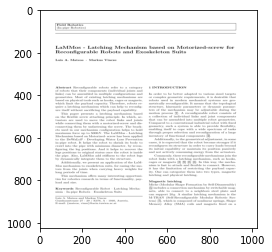

In [183]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
from PIL import Image
 
cpt = 0
cpt_loss_0 = 0

for index in range(len(image_names)):
    
    convert_tensor = transforms.ToTensor()

    img = Image.open("./images/" + image_names[index][:-4] + ".ppm")
    
    img = cv2.imread("./images/" + image_names[index][:-4] + ".ppm")
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

    img_tensor = convert_tensor(img)
    
    img_tensor[0, :, :65] = 1
    plt.imshow(img_tensor.numpy()[0, :, :], cmap="gray")
    
    optimizer.zero_grad()
    
    print(cnn_model(img_tensor))
    
    prediction = torch.round(torch.nn.Sigmoid()(cnn_model(img_tensor))[0]).float()
    
    ground_truth = -1
    
    if image_labels[index] == class_idx_1:
        ground_truth = 1
    else:
        ground_truth = 0
        
    ground_truth = torch.tensor(ground_truth).float()
        
    loss = criterion(prediction, ground_truth)
    loss.backward()

    
    optimizer.step()
    
    print("Loss : " + str(loss.item()))
    
    if loss.item() == 0:
        cpt_loss_0 += 1
    
    
    cpt += 1
    
    print("Accuracy : " + str(100 * cpt_loss_0 / cpt))
    
    #clear_output(wait=True)
    print(str(cpt) + " / " + str(len(list_of_ground_truths)))

In [182]:
import random

number_of_samples_to_test = 244
number_of_correct_predictions = 0

cpt = 0

cpt_loss_0 = 0

for index in range(number_of_samples_to_test):
    
    img = cv2.imread("./images/" + image_names[index][:-4] + ".ppm")
    img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

    img_tensor = convert_tensor(img)
    img_tensor[0, :, :65] = 1
    
    prediction = torch.round(torch.nn.Sigmoid()(cnn_model(img_tensor))[0]).float()
    
    ground_truth = -1
    
    if image_labels[index] == class_idx_1:
        ground_truth = 1
    else:
        ground_truth = 0
        
    ground_truth = torch.tensor(ground_truth).float()
    
    if prediction == ground_truth:
        cpt_loss_0 += 1
    
    
    cpt += 1
    
    print("Accuracy : " + str(100 * cpt_loss_0 / cpt))
    
        
print(100 * number_of_correct_predictions / number_of_samples_to_test)

Accuracy : 100.0


KeyboardInterrupt: 

In [139]:
# KERAS VERSION 

import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import pandas as pd

In [174]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(1024, 1024, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [163]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 1022, 1022, 32)    320       
                                                                 
 conv2d_30 (Conv2D)          (None, 1020, 1020, 64)    18496     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 255, 255, 64)     0         
 g2D)                                                            
                                                                 
 dropout_28 (Dropout)        (None, 255, 255, 64)      0         
                                                                 
 conv2d_31 (Conv2D)          (None, 253, 253, 64)      36928     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 63, 63, 64)       0         
 g2D)                                                 

In [164]:
def to_grayscale(image):
    image = tf.image.rgb_to_grayscale(image)
    return image


train_data_generator = image.ImageDataGenerator(rescale=1./255, shear_range = .2, zoom_range = .2, preprocessing_function=to_grayscale)
test_dataset = image.ImageDataGenerator(rescale=1./255)

In [170]:
for idx in range(len(image_labels)):
    if image_labels[idx] == class_idx_1:
        image_labels[idx] = "class_idx_1"
    else:
        image_labels[idx] = "class_idx_2"

In [171]:
image_infos = {'Filenames':image_names, 'labels':image_labels}

df = pd.DataFrame(image_infos)
print(df)

          Filenames       labels
0    1801.00035.ppm  class_idx_1
1    1801.00077.ppm  class_idx_1
2    1801.00308.ppm  class_idx_1
3    1801.00371.ppm  class_idx_1
4    1801.00388.ppm  class_idx_1
..              ...          ...
223  1812.00488.ppm  class_idx_1
224  1812.00549.ppm  class_idx_2
225  1812.00588.ppm  class_idx_1
226  1812.00611.ppm  class_idx_1
227  1812.04653.ppm  class_idx_2

[228 rows x 2 columns]


In [172]:
train_generator = train_data_generator.flow_from_dataframe(directory='./images/', target_size=(1024, 1024), batch_size = 16, class_mode = 'binary', dataframe = df, x_col = 'Filenames', y_col = 'labels', validate_filenames=False) 

Found 228 non-validated image filenames belonging to 2 classes.


In [160]:
train_generator.class_indices

{'class_idx_1': 0, 'class_idx_2': 1}

In [175]:
fitting = model.fit_generator(train_generator, steps_per_epoch=8, epochs=10)

<ipython-input-175-1e7c05346c6f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fitting = model.fit_generator(train_generator, steps_per_epoch=8, epochs=10)


Epoch 1/10
8/8 [==============================] - 248s 29s/step - loss: 1.5360 - accuracy: 0.4609
Epoch 2/10
8/8 [==============================] - 241s 30s/step - loss: 0.6891 - accuracy: 0.5469
Epoch 3/10
8/8 [==============================] - 213s 26s/step - loss: 0.6744 - accuracy: 0.5469
Epoch 4/10
8/8 [==============================] - 209s 25s/step - loss: 0.6260 - accuracy: 0.6207
Epoch 5/10
8/8 [==============================] - 208s 25s/step - loss: 0.6101 - accuracy: 0.8047
Epoch 6/10
8/8 [==============================] - 217s 26s/step - loss: 0.4792 - accuracy: 0.8190
Epoch 7/10
8/8 [==============================] - 213s 26s/step - loss: 0.3626 - accuracy: 0.8793
Epoch 8/10
8/8 [==============================] - 243s 29s/step - loss: 0.4260 - accuracy: 0.8103
Epoch 9/10
8/8 [==============================] - 201s 24s/step - loss: 0.4911 - accuracy: 0.8362
Epoch 10/10
8/8 [==============================] - 199s 24s/step - loss: 0.3187 - accuracy: 0.8879


In [ ]:
%pwd

In [184]:
model.evaluate(train_generator) # Accuracy on train 

15/15 [==============================] - 90s 6s/step - loss: 0.2757 - accuracy: 0.8904


[0.27568089962005615, 0.890350878238678]

In [177]:
model.save('../cnn_model/model')

INFO:tensorflow:Assets written to: ../cnn_model/model\assets


INFO:tensorflow:Assets written to: ../cnn_model/model\assets


In [180]:
model_saved = keras.models.load_model('../cnn_model/model')

In [185]:
model_saved.evaluate(train_generator)

15/15 [==============================] - 86s 6s/step - loss: 0.2574 - accuracy: 0.9123


[0.2573573887348175, 0.9122806787490845]